In [1]:
import torch
import pickle # 손상된 이미지를 읽어오기 위한 라이브러리
import matplotlib.pyplot as plt

In [2]:
# 핵심 아이디어
# 어떤 함수에 의해서 입력된 이미지가 손상되었다면
# 반대로 랜덤한 이미지를 넣었을 때 해당 함수를 거쳐 같은 결과를 만들어낸다면
# 원본 이미지를 찾을 수 있다.

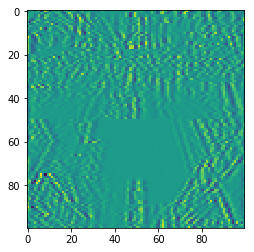

In [3]:
# 행렬로 표현되어 있는 이미지 읽어오기
broken_image = torch.FloatTensor(
    pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1')
) # tensor로 가져온다.

plt.imshow(broken_image.view(100, 100))

In [4]:
# 손상된 이미지를 만드는 함수 weired_function
def weired_function(x, n_iter=5) :
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [5]:
# 오차를 구하는 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

# random tensor
random_tensor = torch.randn(10000, dtype=torch.float)
# learning_rate 설정, 조정 가능
lr = 0.8

In [6]:
# 학습단계, 학습은 반복만큼 이루어져야 한다.
for i in range(0, 20000):
    # random_tensor를 미분할 것이기 때문에 requires_grad 옵션을 True로 설정
    random_tensor.requires_grad_(True)
    # 예측 이미지
    hypothesis = weired_function(random_tensor)
    
    # loss와 학습 진행, loss값의 최소를 구하고 싶다.
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.267659187316895
Loss at 1000 = 1.1220587491989136
Loss at 2000 = 0.5436544418334961
Loss at 3000 = 0.3772156536579132
Loss at 4000 = 0.30025729537010193
Loss at 5000 = 0.2532348334789276
Loss at 6000 = 0.21924404799938202
Loss at 7000 = 0.1920897215604782
Loss at 8000 = 0.16898557543754578
Loss at 9000 = 0.1484764814376831
Loss at 10000 = 0.12972283363342285
Loss at 11000 = 0.11220721900463104
Loss at 12000 = 0.09559555351734161
Loss at 13000 = 0.07966508716344833
Loss at 14000 = 0.06426078081130981
Loss at 15000 = 0.049273837357759476
Loss at 16000 = 0.034626733511686325
Loss at 17000 = 0.020267067477107048
Loss at 18000 = 0.02116401121020317
Loss at 19000 = 0.02116670273244381


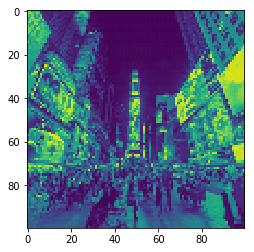

In [7]:
# 원본 이미지는 타임스퀘어였다!
plt.imshow(random_tensor.view(100, 100).data)